In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f1(Precision, Recall):
    return 2 * ((Precision * Recall)/(Precision + Recall))

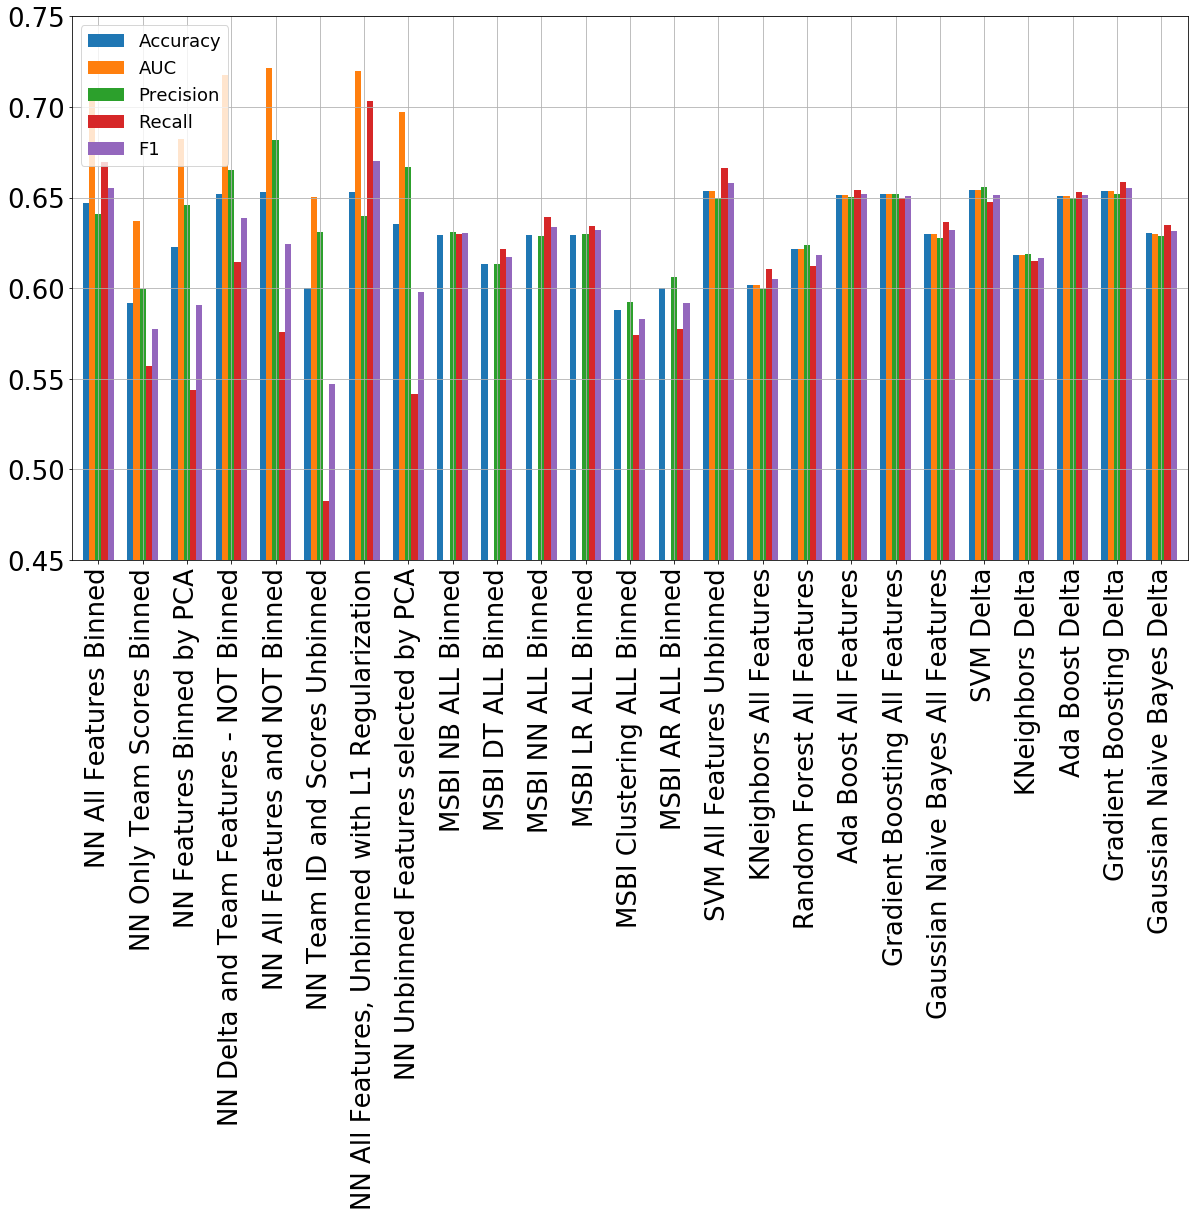

In [11]:
clf_models = {'NN All Features Binned':[0.64701045, 0.7092022, 0.64105254, 0.6697415, f1(0.64105254, 0.6697415)],
              'NN Only Team Scores Binned':[0.59201866, 0.6373043, 0.5994888, 0.55694586, f1(0.5994888, 0.55694586)],
              'NN Features Binned by PCA':[0.62260014, 0.6824659, 0.6461204, 0.543794, f1(0.6461204, 0.543794)],
              'NN Delta and Team Features - NOT Binned':[0.65208447, 0.7176101, 0.6650188, 0.6143027, f1(0.6650188, 0.6143027)],
              'NN All Features and NOT Binned':[0.65322727, 0.7217171, 0.6818821, 0.57576036, f1(0.6818821, 0.57576036)],
              'NN Team ID and Scores Unbinned':[0.59983546, 0.6505113, 0.6310135, 0.48278382, f1(0.6310135, 0.48278382)],
              'NN All Features, Unbinned with L1 Regularization':[0.6533187, 0.7196746, 0.6398006, 0.7032606, f1(0.6398006, 0.7032606)],
              'NN Unbinned Features selected by PCA':[0.63526237, 0.69714063, 0.6669665, 0.54178464, f1(0.6669665, 0.54178464)],
              'MSBI NB ALL Binned':[0.6293855472172488, 0, 0.6309061858023283, 0.6296127562642369, 0.630258807433588],
              'MSBI DT ALL Binned':[0.613462344291646, 0, 0.6131785847997004, 0.6217919514047077, 0.6174552309142318],
              'MSBI NN ALL Binned':[0.6295379223648623, 0, 0.6285735612450548, 0.6394077448747153, 0.6339443670719314],
              'MSBI LR ALL Binned':[0.6294236410041523, 0, 0.6297301371928238, 0.6343204252088079, 0.6320169465879861],
              'MSBI Clustering ALL Binned':[0.5879395070663974, 0, 0.5921805218208885, 0.5738800303720577, 0.5828866694944665],
              'MSBI AR ALL Binned':[0.5999390499409546, 0, 0.606328710345927, 0.5776006074411542, 0.5916161144812567],
              'SVM All Features Unbinned': [0.6537, 0.6537, 0.6497, 0.6662, 0.6579],
              'KNeighbors All Features': [0.6016, 0.6016, 0.5995, 0.6108, 0.6051],
              'Random Forest All Features': [0.6218, 0.6218, 0.6238, 0.6125, 0.6181],
              'Ada Boost All Features': [0.6514, 0.6514, 0.6502, 0.6541, 0.6522],
              'Gradient Boosting All Features': [0.6517, 0.6517, 0.6519, 0.65, 0.6509],
              'Gaussian Naive Bayes All Features': [0.6297, 0.6297, 0.6276, 0.6365, 0.632],
              'SVM Delta': [0.654, 0.654, 0.6557, 0.6475, 0.6516],
              'KNeighbors Delta': [0.6182, 0.6182, 0.6186, 0.6152, 0.6169],
              'Ada Boost Delta': [0.6508, 0.6508, 0.6499, 0.6528, 0.6514],
              'Gradient Boosting Delta': [0.6537, 0.6537, 0.6519, 0.6587, 0.6553],
              'Gaussian Naive Bayes Delta': [0.6302, 0.6301, 0.6286, 0.6351, 0.6318]
             }

df = pd.DataFrame(clf_models.values(), columns=['Accuracy', 'AUC', 'Precision', 'Recall', 'F1'], index= clf_models.keys())
df.plot.bar(ylim=(0.45,0.75), figsize=(20,10),width=0.70, rot=0)
plt.grid(zorder=0)
plt.legend(loc='lower left')#, bbox_to_anchor=(0, 0.5))
plt.tick_params(axis='x', labelsize=26)
plt.tick_params(axis='y', labelsize=26)
plt.legend(loc=2, prop={'size': 18})
plt.xticks(rotation=90)
plt.show()

In [4]:
# Use to calculate results if needed
def pred(TP,FP,FN,TN):
    Acc = (TP+TN)/(TP+FP+FN+TN)
    AUC = 0
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    F1 = 2 * ((Precision * Recall)/(Precision + Recall))
    return Acc, AUC, Precision, Recall, F1

In [5]:
#print(pred(8189, 5166, 4981, 7915))

In [12]:
print(df.round(2).to_latex().replace('NaN', '').replace('0.00', ''))

\begin{tabular}{lrrrrr}
\toprule
{} &  Accuracy &   AUC &  Precision &  Recall &    F1 \\
\midrule
NN All Features Binned                           &      0.65 &  0.71 &       0.64 &    0.67 &  0.66 \\
NN Only Team Scores Binned                       &      0.59 &  0.64 &       0.60 &    0.56 &  0.58 \\
NN Features Binned by PCA                        &      0.62 &  0.68 &       0.65 &    0.54 &  0.59 \\
NN Delta and Team Features - NOT Binned          &      0.65 &  0.72 &       0.67 &    0.61 &  0.64 \\
NN All Features and NOT Binned                   &      0.65 &  0.72 &       0.68 &    0.58 &  0.62 \\
NN Team ID and Scores Unbinned                   &      0.60 &  0.65 &       0.63 &    0.48 &  0.55 \\
NN All Features, Unbinned with L1 Regularization &      0.65 &  0.72 &       0.64 &    0.70 &  0.67 \\
NN Unbinned Features selected by PCA             &      0.64 &  0.70 &       0.67 &    0.54 &  0.60 \\
MSBI NB ALL Binned                               &      0.63 &   &       0.63

In [6]:
df

,Accuracy,AUC,Precision,Recall,F1
NN All Features Binned,0.647010,0.709202,0.641053,0.669741,0.655083
NN Only Team Scores Binned,0.592019,0.637304,0.599489,0.556946,0.577435
NN Features Binned by PCA,0.622600,0.682466,0.646120,0.543794,0.590557
NN Delta and Team Features - NOT Binned,0.652084,0.717610,0.665019,0.614303,0.638655
NN All Features and NOT Binned,0.653227,0.721717,0.681882,0.575760,0.624344
NN Team ID and Scores Unbinned,0.599835,0.650511,0.631014,0.482784,0.547035
"NN All Features, Unbinned with L1 Regularization",0.653319,0.719675,0.639801,0.703261,0.670031
NN Unbinned Features selected by PCA,0.635262,0.697141,0.666967,0.541785,0.597893
MSBI NB ALL Binned,0.629386,0.000000,0.630906,0.629613,0.630259
MSBI DT ALL Binned,0.613462,0.000000,0.613179,0.621792,0.617455


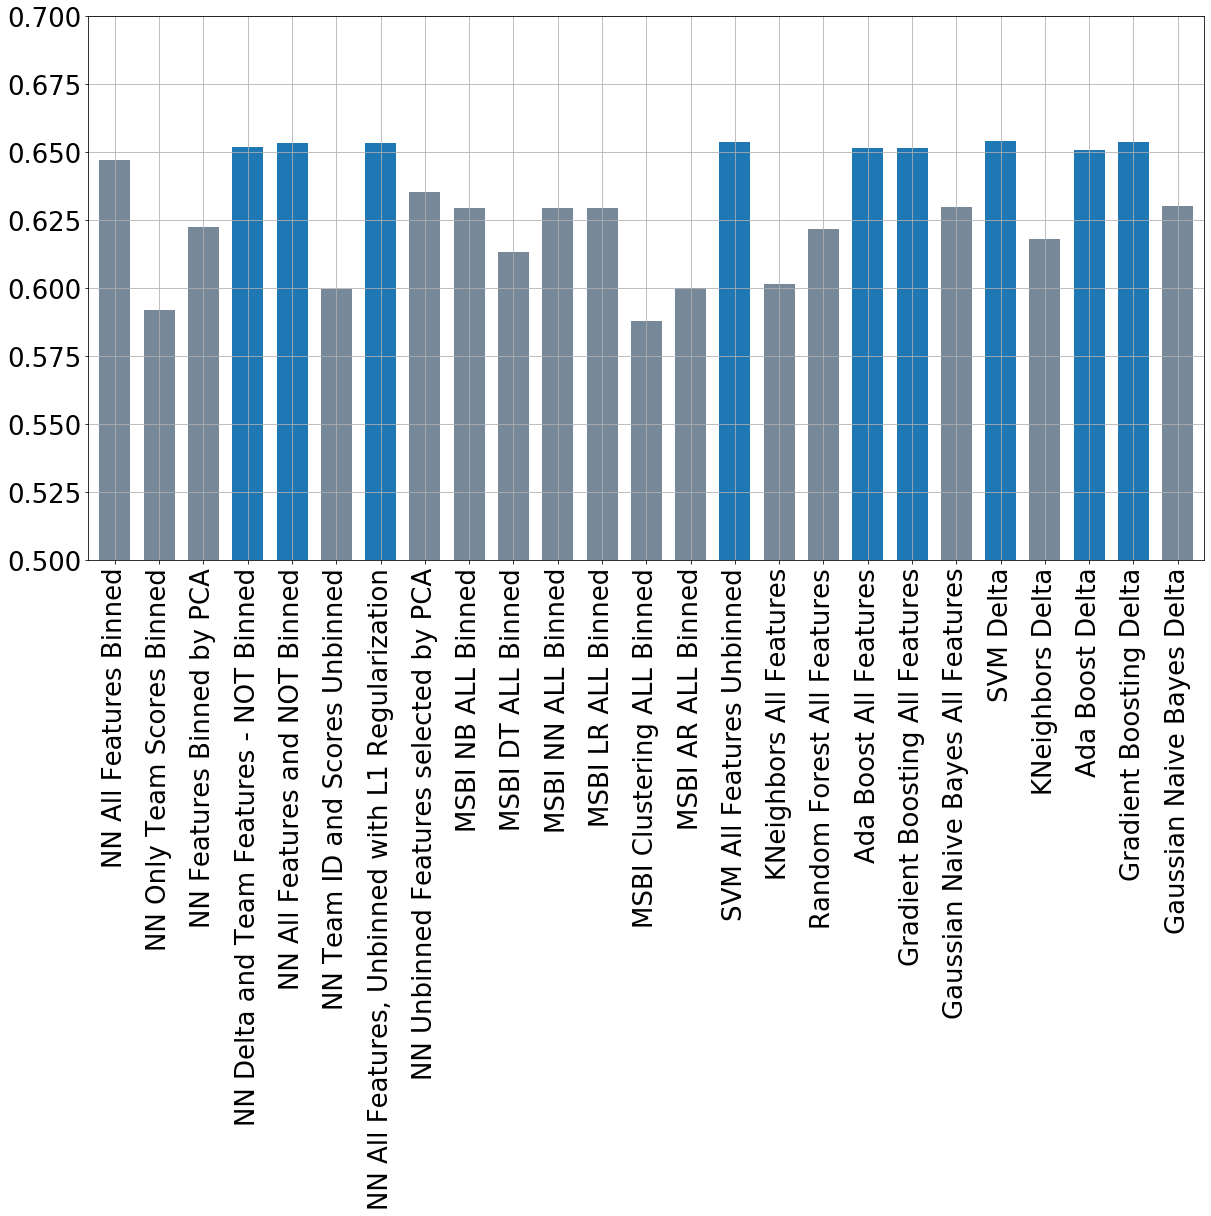

In [43]:
df['best'] = df['Accuracy'] > 0.65
df['Accuracy'].plot.bar(ylim=(0.5,0.7),
                        figsize=(20,10),
                        width=0.70,
                        color=df.best.map({True: 'C0', False: 'lightslategrey'}),
                        rot=0)
plt.grid(zorder=0)
plt.tick_params(axis='x', labelsize=26)
plt.tick_params(axis='y', labelsize=26)
plt.xticks(rotation=90)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

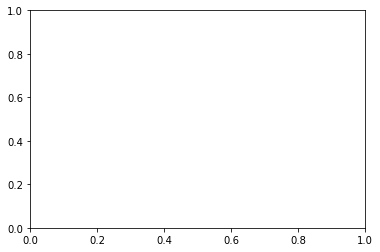

In [33]:
labels = df.columns
y = df['Accuracy']
x = np.arange(len(labels))

fig, ax = plt.subplots()
ax.bar(x, y, 0.35)

In [45]:
print(df['Accuracy'][df['best']].round(4).to_latex())

\begin{tabular}{lr}
\toprule
{} &  Accuracy \\
\midrule
NN Delta and Team Features - NOT Binned          &    0.6521 \\
NN All Features and NOT Binned                   &    0.6532 \\
NN All Features, Unbinned with L1 Regularization &    0.6533 \\
SVM All Features Unbinned                        &    0.6537 \\
Ada Boost All Features                           &    0.6514 \\
Gradient Boosting All Features                   &    0.6517 \\
SVM Delta                                        &    0.6540 \\
Ada Boost Delta                                  &    0.6508 \\
Gradient Boosting Delta                          &    0.6537 \\
\bottomrule
\end{tabular}

